### Домашнее задание 2 Кузнецова Светлана Б06-905 Вариант 26

### Задача 3

In [1]:
#импорт необходимых библиотек
import math 
import numpy as np #операции из линейной алгебры
import pandas as pd #таблицы
import matplotlib.pyplot as plt #графики
import scipy
from scipy import special as sci #для точного решения Бесселя

plt.style.use('seaborn')

Уравнение колебания маятника с затуханием: 

$$\frac{d^{2}x}{dt^{2}} + {\varepsilon}\frac{dx}{dt}+\sin{x} = 0$$

A. Переписать уравнение в виде системы двух уравнений первого порядка. Найти особые точки этой системы, определить их тип.

Б. Найти численно негрубую траекторию, соединяющую две особые точки. В чем трудность решения подобной задачи? Как следует переформулировать задачу? Может ли быть время движения изображающей точки по этой сепаратриссе конечным? Что можно утверждать про устойчивость методов Рунге-Кутты для решения данной задачи?

#### Перепишем в виде системы 2-х уравнений 1 порядка:

\begin{cases}
   \frac{dx}{dt} = y\\
   \frac{dy}{dt} = -{\varepsilon}y - \sin{x}
\end{cases}



#### Найдем особые точки. В особых точках фазовые скорости равны 0:
$$ y = 0 $$
$$ εy+sinx = 0 $$

Из системы получаем, что множество особых точек имеет вид:
 $$ (x,y) : x = \pi \cdot n;  y = 0 ,  n \in Z $$

#### Для определения характера особых точек, линеаризуем систему в окрестности положения равновесия:
 $$ \frac{dx}{dt} = -y $$
 $$ \frac{dy}{dt} = y + (-1)^n * (x-\pi*n) $$

В матричном виде:
\begin{equation}
    \begin{pmatrix} \frac{dx}{dt} \\ \frac{dy}{dt} \end{pmatrix} = \begin{pmatrix}
0 & -1 \\
(-1)^{n} & {\varepsilon}
\end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix}
\end{equation}

#### Собственные числа матрицы (положим $\varepsilon = 0.01$ ) для чётных n имеют вид 
$$\lambda_{1} = 0.005+0.999987i$$
$$\lambda_{2} = 0.005-0.999987i$$

#### Для численного решения системы ОДУ реализуем ЯМРК 4 порядка аппроксимации:

In [2]:
def runge_kutta_4(start, stop, step, v_0, w_0, der_v, der_w):
    t = [start]
    solution_v = [v_0]
    solution_w = [w_0]
    if start < stop and step > 0:
        while stop > t[-1]:
            k_1_v = der_v(t[-1], solution_v[-1], solution_w[-1])
            k_1_w = der_w(t[-1], solution_v[-1], solution_w[-1])
            k_2_v = der_v(t[-1] + step/2, solution_v[-1]+step/2*k_1_v, 
                         solution_w[-1] +step/2 * k_1_w)
            k_2_w = der_w(t[-1]+step/2, solution_v[-1] + step/2*k_1_v, 
                         solution_w[-1] + step/2 * k_1_w)
            k_3_v = der_v(t[-1]+step/2, solution_v[-1] + step/2*k_2_v,
                         solution_w[-1] + step/2*k_2_w)
            k_3_w = der_w(t[-1] + step/2, solution_v[-1] + step/2 * k_2_v,
                         solution_w[-1] + step/2 * k_2_w)
            k_4_v = der_v(t[-1] + step, solution_v[-1] + step * k_3_v, solution_w[-1] +
                          step * k_3_w)
            k_4_w = der_w(t[-1] + step, solution_v[-1] + step * k_3_v, solution_w[-1] +
                          step * k_3_w)
            solution_v.append(solution_v[-1] + step/6 * (k_1_v + 2 * k_2_v + 2 * k_3_v + k_4_v))
            solution_w.append(solution_w[-1] + step/6 * (k_1_w + 2 * k_2_w + 2 * k_3_w + k_4_w))
            t.append(t[-1] + step)
    elif start > stop and step < 0:
        while stop < t[-1]:
            k_1_v = der_v(t[-1], solution_v[-1], solution_w[-1])
            k_1_w = der_w(t[-1], solution_v[-1], solution_w[-1])
            k_2_v = der_v(t[-1] + step/2, solution_v[-1] + step/2 * k_1_v, solution_w[-1] + 
                          step/2 * k_1_w)
            k_2_w = der_w(t[-1] + step/2, solution_v[-1] + step/2 * k_1_v, solution_w[-1] + 
                          step/2 * k_1_w)
            k_3_v = der_v(t[-1] + step/2, solution_v[-1] + step/2 * k_2_v, solution_w[-1] + 
                          step/2 * k_2_w)
            k_3_w = der_w(t[-1] + step/2, solution_v[-1] + step/2 * k_2_v, solution_w[-1] + 
                          step/2 * k_2_w)
            k_4_v = der_v(t[-1] + step, solution_v[-1] + step * k_3_v, solution_w[-1] + step * k_3_w)
            k_4_w = der_w(t[-1] + step, solution_v[-1] + step * k_3_v, solution_w[-1] + step * k_3_w)
            solution_v.append(solution_v[-1] + step/6 * (k_1_v + 2 * k_2_v + 2 * k_3_v + k_4_v))
            solution_w.append(solution_w[-1] + step/6 * (k_1_w + 2 * k_2_w + 2 * k_3_w + k_4_w))
            t.append(t[-1] + step)
    else:
        print('В этом направлении двигаться невозможно')
    return(t, solution_v, solution_w)                         

#### Для получения траектории, соединяющей особые точки, неоходимо начать движение в области неустойчивости седла и попасть в сферу притяжения фокуса или действия другого седла. Сепаратриса седла переходит в закручивающуюся спираль фркуса, однако "сесть" на неё практически невозможно.


In [3]:
def xdot(t, x, y):
    return(-y) 
def ydot(t, x, y):
    return(0.01 * y + math.sin(x))

In [4]:
solution_runge_kutta_4 = runge_kutta_4(0,10,0.1,math.pi - 0.6, 0.01, xdot, ydot)
solution_runge_kutta_4_2 = runge_kutta_4(0, 10, 0.01, 0.3, 0.3, xdot, ydot)

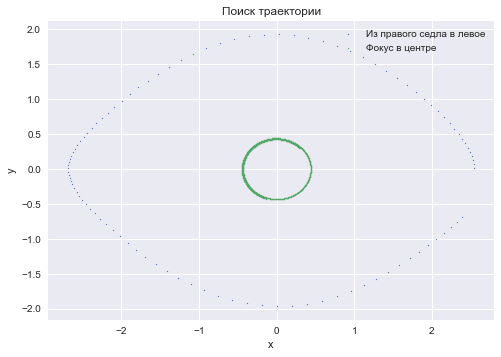

In [5]:
plt.title('Поиск траектории') 
plt.xlabel('x') 
plt.ylabel('y')
plt.axis()
plt.scatter(solution_runge_kutta_4[1], solution_runge_kutta_4[2], s = 1) 
plt.scatter(solution_runge_kutta_4_2[1], solution_runge_kutta_4_2[2], s = 1)
plt.legend(('Из правого седла в левое','Фокус в центре'))
plt.show()

#### 1) Видно, что попасть в одну особую точку из другой невозможно. 2) Время движения по сепаратриссе не может быть конечным, так как из известного решения изначального уравнения следует, что точка (0,0) достигается за бесконечное время.  С другой стороны, численный метод попадёт в (0,0) за конечное время из-за конечной арифметики.